# Prototype 01
#### Tasks
##### Done

- Check timos epsilon decay strategy [✓]
- Split the dataset presented to each client [✓]
- Check the format of training data [✓]
- Add softmax to the last layer [✓] 
- Make function to save the most important details about an experiment in a README.md file and save it with the models and the graphics [✓]
- Improve the log experiment function [✓]
- Check why the learning curve shows twice as many epochs as actually existent [✓]
- Add saving functionality to the plotting functions [✓]
- write the experiment summary directly into the md file [✓]
- Add the global training time and the round training time [✓]
- Add a name function to the agent and make the global agent return the correct name [✓]
- Check why there is twice as many episodes in the graph as there should be [✓]
- Align the markdown table to the left [✓]
- Save the full training time [✓]
- Save the rount training time on each client [✓]
- Add the execution date to the experiment report [✓]
- Use the pipe table [✓]
- How many threads can my macbook pro run in parallel => 6 (12 with Hyperthreadding) [✓]
- Check if the experiment directory already exists and if yest delete it and make space for the new files [✓]
- Check different types of tables [✓]
- Remove the verbosity flag from the server train functions [✓]
- Change the blue in the graphics to a darker blue and the red to a more poppy color. [✓]
- Make a subindex possible for the experiment [✓]
- Check if the replay memoery init can be moved internally (client_01.init_replay_memory(MIN_REPLAY_SIZE)) [✓]
- Check that the test data is independant from the train data [✓]
- Validate the copying of the parameters works properly [✓]
- Weight aggregation does not take a lot of time [✓].

##### Open


- How often do i have to initialze the replay memory?
- Make sure that the weights of the DQN are not being reset by the training
- If you really want to make this work online then the right aggregation strategy is key. Maybe ensemble models would be good.
- Check different federated aggregation strategies for class distinct problems
- Parallelize the training
- Move the training to the GPU.
- Make the threadding more efficient
- Add f1 score and confusion matrix
- Check the weighting strategy that Timo used
- Ipmlemtne Multiclass Imbalance Degree (MID) Metric
- Print a graph with overall attack detection accuracy (How many got mitigated and how many did not get mitigated)
- Check which loss we are using (purpose of binary cross entropy loss)
- Add confusion matrices
- Check RMS Prop
- Check why there is 4 actions (possible outputs) of the DQN while we only use 3 MTDs. Does zero mean no MTD?
- Move each class to its own file
- Better split the training data to clients
- What is the purpose of share memory function?
- Check if the DQN is always randomly re-initialized
- plot the training data splits
- Check why the parallelized training is not faster?
- Maybe we should use the model with the best test performance
- Check why there is 4 output actions
- Check the format of the training data
- Make graphs that cover the global test accuracy over all rounds for all clients (including the global agent)
- Make sure that the online & target network is randomyl re-initialized again
- Make a historgram of samples chosen in each round and a historgram of sample classes chosen over the whole training
- incorporate the confusion matrix
- Make a performance table where you have the true behavior and the predicted action.
- Check hyperparameter search.

## Training on Google Collab 

In [1]:
# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

ModuleNotFoundError: No module named 'google'

In [ ]:
# Go to base directory
%cd /content/drive/MyDrive/University/Master-Thesis/Code

## Training on Local Machine

In [1]:
import os

original_working_directory_path = os.getcwd()
print("The original working directory is {0}".format(os.getcwd()))

def to_original_working_directory():
    os.chdir(original_working_directory_path)
    print(f"Changed to original working directory {original_working_directory_path}")

The original working directory is /Users/jankreischer/Library/Mobile Documents/com~apple~CloudDocs/Master-Thesis/Code/prototypes/prototype_01


In [2]:
def to_root_working_directory():
    root_working_directory_path = os.path.join(original_working_directory_path, "../..")
    os.chdir(root_working_directory_path)
    print(f"Changed to root working directory {os.getcwd()}")

In [3]:
to_root_working_directory()

Changed to root working directory /Users/jankreischer/Library/Mobile Documents/com~apple~CloudDocs/Master-Thesis/Code


In [4]:
# Validate that python 3.10 is used
!python --version

Python 3.10.10


In [5]:
def seed_random():
    random.seed(42)
    torch.random.manual_seed(42)
    np.random.seed(42)

## --- Dependencies ---

In [6]:
# Standard Dependencies
import sys
import os
import numpy as np
from time import time

In [7]:
# Global Dependencies
from src.custom_types import Behavior, MTDTechnique
from src.data_provider import DataProvider
#from src.agent import Agent
#from src.simulation_engine import SimulationEngine
from src.evaluation_utils import plot_learning, seed_random, get_pretrained_agent, evaluate_agent_on_afterstates

/Users/jankreischer/opt/anaconda3/envs/FedRL-for-IT-Sec/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## --- Hyperparameters ---

In [8]:
# Hyperparams

GAMMA = 0.1 #0.99 # discount factor for future rewards
BATCH_SIZE = 100
N_EPISODES = 10000

NR_ROUNDS = 10
NR_EPISODES_PER_ROUND = 1000

BUFFER_SIZE = 500
MIN_REPLAY_SIZE = 100
# Epsilon determining Exploration Exploitation Trade Off
EPSILON_START = 1.0
EPSILON_DEC = 1e-4 # 0.001
EPSILON_END = 0.01

TARGET_UPDATE_FREQ = 100
LEARNING_RATE = 1e-4
LOG_FREQ = 100
DIMS = 20
PI = 3

## --- Source ---

In [9]:
def split_training_data(training_data, n_strides):
    strides = []
    for i in range(n_strides):
        strides.append(dict())

    for key, value in training_data.items():
        #print(f"{key} => {len(value)}")
        array_split = np.array_split(value, n_strides)
        for i in range(n_strides):
            strides[i][key] = array_split[i]
        
    return stridesap

In [10]:
from prototypes.prototype_01.sensor_environment import SensorEnvironment

In [38]:
#from prototypes.prototype_01.deep_q_network import DeepQNetwork

ImportError: cannot import name 'DeepQNetwork' from 'prototypes.prototype_01.deep_q_network' (/Users/jankreischer/Library/Mobile Documents/com~apple~CloudDocs/Master-Thesis/Code/prototypes/prototype_01/deep_q_network.py)

In [11]:
from prototypes.prototype_01.agent import Agent

In [12]:
from prototypes.prototype_01.client import Client

In [13]:
import os

def print_process_ids():
    pid = os.getpid()
    ppid = os.getppid()

    print("Parent Process ID of current process:", ppid)
    print("Process ID of current process:", pid)
    
print_process_ids()

Parent Process ID of current process: 6105
Process ID of current process: 7063


In [14]:
from enum import Enum, auto

class Execution(Enum):
    SEQUENTIAL = auto()
    MULTI_THREADED = auto()
    MULTI_PROCESSING = auto()
    MULTI_PROCESSING_POOL = auto()

In [33]:
#NR_ROUNDS = 10
#NR_EPISODES_PER_ROUND = 1000
import torch
from torch import nn
import copy
from time import time, time_ns

from typing import List, Dict
import threading
import numpy as np
import json
from tabulate import tabulate
from datetime import date
from src.custom_types import MTDTechnique, Behavior
#from multiprocessing import Process
import multiprocessing

class Server:
    def __init__(self, global_agent: Agent, test_data, experiment_id, save_path, nr_rounds = NR_ROUNDS, nr_episodes_per_round=NR_EPISODES_PER_ROUND, parallelized=False):
        self.clients = []
        self.global_agent = global_agent
        self.test_data = test_data
        self.save_path = save_path
        self.experiment_id = experiment_id
        self.file_path = os.path.join(save_path, f"experiment-{experiment_id:02d}_summary.md")
        self.nr_rounds = nr_rounds
        self.nr_epochs_per_round = nr_episodes_per_round
        self.parallelized = parallelized
        self.total_training_time = None
        self.round_times = []

        self.performance_evaluations = {}
        self.performance_evaluations[0] = {}
        self.performance_evaluations["rounds"] = []
        for behavior in Behavior:
            self.performance_evaluations[0][behavior] = []
        
        
    def aggregate_weights(self):
        client_parameters = {client.client_id: client.get_weights() for client in self.clients}
        client_weight = 1/len(self.clients)
        
        aggregated_weights = copy.deepcopy(next(iter(client_parameters.values())))  # names
        for parameter_name in aggregated_weights:
            aggregated_weights[parameter_name] = torch.zeros(aggregated_weights[parameter_name].shape)
        for client_parameter in client_parameters.values():
            for parameter_name in aggregated_weights:
                aggregated_weights[parameter_name] += client_parameter[parameter_name] * client_weight  # averaging

        self.global_agent.update_weights(aggregated_weights)
        
        
    def broadcast_weights(self):
        for client in self.clients:
            client.receive_weights(self.global_agent.get_weights())

    def add_client(self, client: Client):
        self.clients.append(client)
        
        self.performance_evaluations[client.client_id] = {}
        for behavior in Behavior:
            self.performance_evaluations[client.client_id][behavior] = []
    
    

    def run_federation(self, execution=Execution.SEQUENTIAL, evaluations=[], evaluation_frequency: int = 10, verbose=True, document_results=True):
        if "time" in evaluations:
            start_time = time()
        
        if document_results:
            self.document("")
            self.document(f"# Prototype 1 (Experiment {self.experiment_id})")
            self.document("---")
            self.document("")
            self.document(f"Executed on {date.today().strftime('%d.%m.%Y')}")
            self.save_experiment_summary()
        
        for nr_round in range(1, self.nr_rounds+1):
            if nr_round % evaluation_frequency == 0:
                if document_results:
                    self.document("")
                    self.document('<div style="page-break-after: always;"></div>')
                    self.document("")
                    self.document("---")
                    self.document(f"### Training Round {nr_round}/{self.nr_rounds}")
                    self.document("")

            if verbose:
                print(f">>> SERVER TRAINING ROUND {nr_round}/{self.nr_rounds} <<<")
                
            for client in self.clients:
                client.receive_weights(self.global_agent.get_weights())
                   
            match execution:
                case Execution.MULTI_THREADED:
                    threads = []
                    for client in self.clients:
                        client.agent.online_net.share_memory()
                        t = threading.Thread(target=Client.train_agent, args=(client, self.nr_epochs_per_round, 100))
                        t.start()
                        threads.append(t)
                    for t in threads:
                        # Wait until all workers are done with training
                        t.join()
                        
                        
                case Execution.MULTI_PROCESSING:
                    threads = []
                    for client in self.clients:
                        thread = multiprocessing.Process(target=Client.train_agent, args=(client, self.nr_epochs_per_round, 100))  
                        thread.start()
                        threads.append(thread)

                    for thread in threads:
                        thread.join() 
                       
                case Execution.MULTI_PROCESSING_POOL:
                    pool = multiprocessing.Pool(processes=len(self.clients))
                    pool.starmap(Client.train_agent, map(lambda client: (client, self.nr_epochs_per_round), self.clients))
                    pool.close()
                    pool.join()
                    
                case _:
                    for client in self.clients:
                        client.train_agent(self.nr_epochs_per_round, 100)
                    
            self.aggregate_weights()
            if nr_round % evaluation_frequency == 0:
                self.performance_evaluations['rounds'].append(nr_round)
                for client in self.clients:
                    self.document(f"- Training Round {nr_round} on Client {client.client_id} took {round(client.get_training_time(), 2)}s")
                
                if "learning_curve" in evaluations:
                    for client in self.clients:
                        filename = f"round-{self.prefix(nr_round)}_agent-{(client.client_id):02d}_learning-curve.png"
                        client.plot_learning_curve(filename, nr_round)
                        self.document(f"![graph]({filename})")
                   
                if "performance_evaluation" in evaluations:
                    for client in self.clients:  
                        print(f"\n=== {client.agent.get_name()} - Evaluation ===\n")
                        self.performance_evaluation(client.agent, self.test_data)
                        self.confusion_matrix(client.agent, self.test_data)
                        self.behavior_action_evaluation(client.agent, self.test_data)

                    print(f"\n=== {self.global_agent.get_name()} - Evaluation ===\n")
                    self.performance_evaluation(self.global_agent, self.test_data)
                    self.confusion_matrix(self.global_agent, self.test_data)
                    self.behavior_action_evaluation(self.global_agent, self.test_data)
        
            if "time" in evaluations:
                round_time = time()
                time_elapsed = round_time - start_time
                self.round_times.append(time_elapsed)
                print(f"Total time elapsed until end of round {nr_round}: {time_elapsed}s")    
        
        if "time" in evaluations:
            end_time = time()
            total_training_time = end_time - start_time
            print(f"Total training time with {len(self.clients)} clients: {total_training_time}")
            self.total_training_time = total_training_time
            
            if document_results:
                self.document(f"\n ### Total training time with {len(self.clients)}: {round(total_training_time, 2)}s")
            
            return total_training_time
           
    def document(self, text):
        text = text.replace("_", "\_")
        if self.save_path:
            with open(self.file_path,'a') as f:
                # Add newline to text
                text += "  \n"
                f.write(text)   
                
    def document_block(self, text):
        text = text.replace("_", "\_")
        if self.save_path:
            with open(self.file_path,'a') as f:
                # Add newline to text
                text += "\n \n  \n \n"
                f.write(text)  
                            
                    
    def prefix(self, round: int): 
        prefix_length = len(str(self.nr_rounds))
        return f"{round:0{prefix_length}d}"

    def plot_learning_curves(self):
        for client in self.clients:
            episode_returns, eps_history = client.get_training_summary()
            plot_learning_curve(f"{client.client_id}", episode_returns, eps_history)
            
    def save_experiment_summary(self):
        experiment_summary = {}
        self.document("## Configuration")
        self.document("### Server")
        self.document(f"- nr_clients: {len(self.clients)}")
        self.document(f"- nr_rounds: {self.nr_rounds}")
        self.document(f"- nr_epochs_per_round: {self.nr_epochs_per_round}")
        self.document(f"- parallelized: {self.parallelized}")
        self.document("")
        
        for client in self.clients:
            self.document(f"### Client {client.client_id}")
            self.document(f"- gamma: {client.agent.gamma}")
            self.document(f"- learning_rate: {client.agent.lr}")
            self.document(f"- batch_size: {client.agent.batch_size}")
            self.document(f"- epsilon_max: {client.agent.eps_max}")
            self.document(f"- epsilon_min: {client.agent.eps_min}")
            self.document(f"- epsilon_decay: {client.agent.eps_dec}")
            self.document(f"- input_dims: {client.agent.input_dims}")
            self.document(f"- output_dims: {client.agent.n_actions}")
            self.document("")

            self.document(f"Training Data Split")
            for key, value in client.environment.train_data.items():
                self.document(f"- {len(value)} samples of {key}")
                
            client.plot_training_data_split()
            self.document(f"![](behavior_sample_distribution_on_client-{client.client_id:02d}.png)")
            
        self.document(f"### Global Agent") 
        self.document(f"- id: {self.global_agent.agent_id}")
        self.document(f"- batch_size: {self.global_agent.batch_size}")
        self.document(f"- epsilon: 0")
        self.document(f"- batch_size: {self.global_agent.input_dims}")
        self.document(f"- batch_size: {self.global_agent.n_actions}")

            
    def performance_evaluation(self, agent: Agent, test_data):
        # check predictions with learnt dqn
        agent.online_net.eval()
        res_dict = {}
        objective_dict = {}
        with torch.no_grad():
            for b, d in test_data.items():
                if b != Behavior.NORMAL:
                    cnt_corr = 0
                    cnt = 0
                    for state in d:
                        action = agent.take_greedy_action(state[:-1])
                        if b in supervisor_map[action]:
                            cnt_corr += 1
                        cnt += 1
                    res_dict[b] = (cnt_corr, cnt)

                for i in range(len(actions)):
                    if b in supervisor_map[i]:
                        objective_dict[b] = actions[i]
        labels = ("Behavior", "Accuracy", "Objective")
        results = []

        for behavior, t in res_dict.items():
            #print("---")
            #print(f"behavior: {behavior} {behavior.value}")
            accuracy = t[0] / t[1] * 100
            accuracy_in_percent = round(accuracy, 2)
            #print(f"accuracy_in_percent: {accuracy_in_percent}")
            self.performance_evaluations[agent.agent_id][behavior].append(accuracy_in_percent)
            results.append((behavior.value, accuracy_in_percent, objective_dict[behavior].value))

        self.document(f"\n\n{agent.get_name()}\n")
        self.document(tabulate(results, headers=labels, tablefmt="pipe"))

        print(f"{agent.get_name()} > Performance Evaluation")
        print(tabulate(results, headers=labels, tablefmt="pipe"))
        
        
    def confusion_matrix(self, agent: Agent, test_data):
        agent.online_net.eval()
        confusion_matrix = np.zeros((4,4))
          
        with torch.no_grad():
            for behavior, state_samples in test_data.items():
                if behavior != Behavior.NORMAL:
                    for state_sample in state_samples:
                        a_pred = agent.take_greedy_action(state_sample[:-1])
                        if behavior in supervisor_map[a_pred]:
                               confusion_matrix[a_pred][a_pred] +=1
                        else:
                            leftover_actions = [i for i in range(4) if i != a_pred]
                            for leftover_action in leftover_actions:
                                if behavior in supervisor_map[leftover_action]:
                                   confusion_matrix[leftover_action][a_pred] +=1
          
        mtds = list(map(lambda x: x.value, actions))
        results = np.concatenate((np.array(mtds).reshape((-1, 1)), confusion_matrix), axis=1)
        labels = ["MTD_true/ MTD_pred"] + mtds
        print("")
        print(f"{agent.get_name()} > Confusion Matrix")
        print(tabulate(results, headers=labels, tablefmt="pipe"))
        
    def behavior_action_evaluation(self, agent: Agent, test_data):
        n_behaviors = len(Behavior) - 1
        n_actions = len(actions)
        matrix = np.zeros((n_behaviors, n_actions))
        
        behavior_action_counts = {}
        for behavior in Behavior:
            if behavior != Behavior.NORMAL:
                behavior_action_counts[behavior] = np.zeros((1, n_actions))
        
        with torch.no_grad():
            for behavior, state_samples in test_data.items():
                if behavior != Behavior.NORMAL:
                    for state_sample in state_samples:
                        a_pred = agent.take_greedy_action(state_sample[:-1])
                        behavior_action_counts[behavior][0][a_pred]+=1
          
        labels = ["behavior"] + list(map(lambda x: x.value, actions))
        
        results = np.empty((0, n_actions+1))
        for behavior, action_counts in behavior_action_counts.items():
            row = np.append(np.array([behavior]).reshape(-1, 1), action_counts, axis=1)
            results = np.concatenate((results, row), axis=0)
        
        print(f"\n{agent.get_name()} > Behavior Action Evaluation")
        print(tabulate(results, headers=labels, tablefmt="pipe"))

        
    def print_performance_evaluations(self):
        for behavior in Behavior:
            for id in range(len(self.clients)+1):
                performance = self.performance_evaluations[id][behavior]
                rounds = self.performance_evaluations['rounds']
                plt.title(f"Mitigation Accuracy for {behavior}")
                plt.ylim([0,100])
                if id == 0:
                    plt.plot([*range(len(performance))], performance, linestyle='-', label=f"Global Agent") # plotting t, a separately 
                else:
                    plt.plot([*range(len(performance))], performance, linestyle='--', label=f"Agent {id}") # plotting t, a separately 
            plt.xlabel('Round')
            plt.ylabel('Accuracy [%]')
            plt.show()

In [16]:
import os
import shutil

class Experiment:
    def __init__(self, base_path):
        self.base_path = base_path
        
    def get_experiment_path(self, experiment_id, experiment_version=0):
        path = os.path.join(self.base_path, f"experiments/experiment_{experiment_id:02d}")
        if experiment_version != 0:
            path = os.path.join(path, f"version_{experiment_version:02d}")
            
        print(path)
        if not os.path.exists(path):
            os.makedirs(path)
        else:
            shutil.rmtree(path)          
            os.makedirs(path)
            
        return path

-----------
## --- Experiments ---
### Experiment 01

In [ ]:
import math

experiments = Experiment(original_working_directory_path)
experiment_id = 10
experiment_version = 0
experiment_path = experiments.get_experiment_path(experiment_id, experiment_version)

TOTAL_NUMBER_OF_EPISODES = 10000
NR_ROUNDS = 10
MAX_NUMBER_OF_CLIENTS = 10

seed_random()

train_data, test_data, _ = DataProvider.get_scaled_train_test_split(scaling_minmax=True, scale_normal_only=True)

single_threaded_training_times = {}
single_threaded_round_times = {}
multi_threaded_training_times = {}
multi_threaded_round_times = {}



for nr_clients in range(1, MAX_NUMBER_OF_CLIENTS + 1):
    for parallelized in [True, False]:
        print(f"nr_clients: {nr_clients}; parallelized: {parallelized}")

        environment = SensorEnvironment(train_data)
        global_agent = Agent(0, input_dims=environment.observation_space_size, n_actions=len(environment.actions), buffer_size=BUFFER_SIZE,
                    batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)
        # We want to train for n episodes when adding all episodes across all clients and rounds
        nr_episodes_per_round = math.floor(TOTAL_NUMBER_OF_EPISODES / (NR_ROUNDS * nr_clients))
        server = Server(global_agent, test_data, experiment_id, experiment_path, nr_rounds=NR_ROUNDS, nr_episodes_per_round=nr_episodes_per_round, parallelized=parallelized)

        for unique_id in range(1, nr_clients + 1):
            environment = SensorEnvironment(train_data)
            agent = Agent(unique_id, input_dims=environment.observation_space_size, n_actions=len(environment.actions), buffer_size=BUFFER_SIZE,
                  batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)                               
            client = Client(unique_id, agent, environment, experiment_path, MIN_REPLAY_SIZE)                                   
            server.add_client(client)

        server.run_multiprocessing_federation(evaluations=["time"], evaluation_frequency=10, verbose=False, document_results=False)
        if parallelized:
            multi_threaded_training_times[nr_clients] = server.total_training_time
            multi_threaded_round_times[nr_clients] = server.round_times
        else:
            single_threaded_training_times[nr_clients] = server.total_training_time
            single_threaded_round_times[nr_clients] = server.round_times

In [96]:
#flattend_test_data = np.empty([0,47])
#for behavior_data in test_data.values():
#    flattend_test_data = np.concatenate((flattend_test_data, behavior_data), axis=0)
#
#print(flattend_test_data[:10]])

In [30]:
import math

experiments = Experiment(original_working_directory_path)
experiment_id = 10
experiment_version = 0
experiment_path = experiments.get_experiment_path(experiment_id, experiment_version)

TOTAL_NUMBER_OF_EPISODES = 10000
NR_ROUNDS = 10
MAX_NUMBER_OF_CLIENTS = 10

seed_random()

train_data, test_data, _ = DataProvider.get_scaled_train_test_split(scaling_minmax=True, scale_normal_only=True)

single_threaded_training_times = {}
single_threaded_round_times = {}
multi_threaded_training_times = {}
multi_threaded_round_times = {}

for nr_clients in range(1, MAX_NUMBER_OF_CLIENTS + 1):
    for parallelized in [True, False]:
        print(f"nr_clients: {nr_clients}; parallelized: {parallelized}")

        environment = SensorEnvironment(train_data)
        global_agent = Agent(0, input_dims=environment.observation_space_size, n_actions=len(environment.actions), buffer_size=BUFFER_SIZE,
                    batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)
        # We want to train for n episodes when adding all episodes across all clients and rounds
        nr_episodes_per_round = math.floor(TOTAL_NUMBER_OF_EPISODES / (NR_ROUNDS * nr_clients))
        server = Server(global_agent, test_data, experiment_id, experiment_path, nr_rounds=NR_ROUNDS, nr_episodes_per_round=nr_episodes_per_round, parallelized=parallelized)

        for unique_id in range(1, nr_clients + 1):
            environment = SensorEnvironment(train_data)
            agent = Agent(unique_id, input_dims=environment.observation_space_size, n_actions=len(environment.actions), buffer_size=BUFFER_SIZE,
                  batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)                               
            client = Client(unique_id, agent, environment, experiment_path, MIN_REPLAY_SIZE)                                   
            server.add_client(client)

        server.run_federation(evaluations=["time"], evaluation_frequency=10, verbose=False, document_results=False)
        if parallelized:
            multi_threaded_training_times[nr_clients] = server.total_training_time
            multi_threaded_round_times[nr_clients] = server.round_times
        else:
            single_threaded_training_times[nr_clients] = server.total_training_time
            single_threaded_round_times[nr_clients] = server.round_times

/Users/jankreischer/Library/Mobile Documents/com~apple~CloudDocs/Master-Thesis/Code/prototypes/prototype_01/experiments/experiment_10
/Users/jankreischer/Library/Mobile Documents/com~apple~CloudDocs/Master-Thesis/Code
nr_clients: 1; parallelized: True
Total time elapsed until end of round 1: 4.837022066116333s


KeyboardInterrupt: 

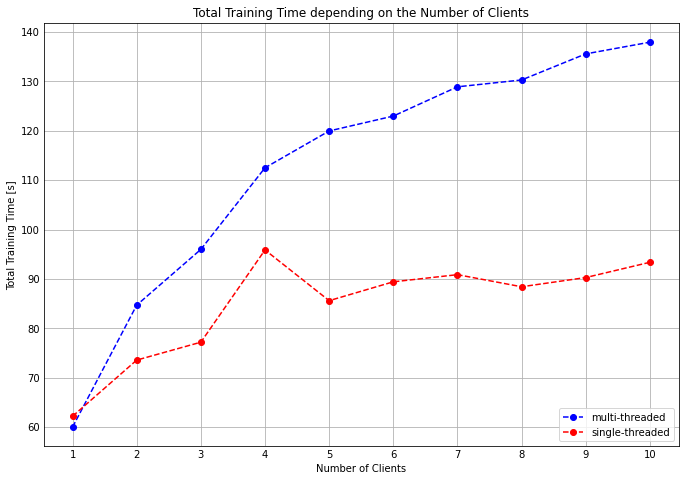

In [118]:
single_threaded_training_times = {
    1: 62.185861587524414,
    2: 73.55881094932556,
    3: 77.18544721603394,
    4: 95.86744952201843,
    5: 85.5958263874054,
    6: 89.41081714630127,
    7: 90.85983729362488,
    8: 88.41040182113647,
    9: 90.274986743927,
    10: 93.36574625968933
}

multi_threaded_training_times = {
    1: 59.996912240982056,
    2: 84.69177293777466,
    3: 95.97647094726562,
    4: 112.5046796798706,
    5: 119.96393752098083,
    6: 122.97974967956543,
    7: 128.90417885780334,
    8: 130.29015493392944,
    9: 135.57496786117554,
    10: 137.94399547576904
}

plt.figure(figsize=(9,6))
xlabel = "Number of Clients"
ylabel = "Total Training Time"
plt.xlabel(xlabel)
plt.ylabel(f"{ylabel} [s]")
plt.title(f"{ylabel} depending on the {xlabel}")
plt.xticks(np.arange(1, 11, 1))
#plt.figure(facecolor='white')
plt.plot(list(multi_threaded_training_times.keys()), list(multi_threaded_training_times.values()), color="#0000FF", marker='o', linestyle='dashed', label='multi-threaded')
plt.plot(list(single_threaded_training_times.keys()), list(single_threaded_training_times.values()), color="#FF0000", marker='o', linestyle='dashed', label='single-threaded')
plt.legend(loc ="lower right")
plt.savefig("prototypes/prototype_01/total_training_time_anaylsis.jpg", dpi=150, bbox_inches = "tight", transparent=False)
plt.show()

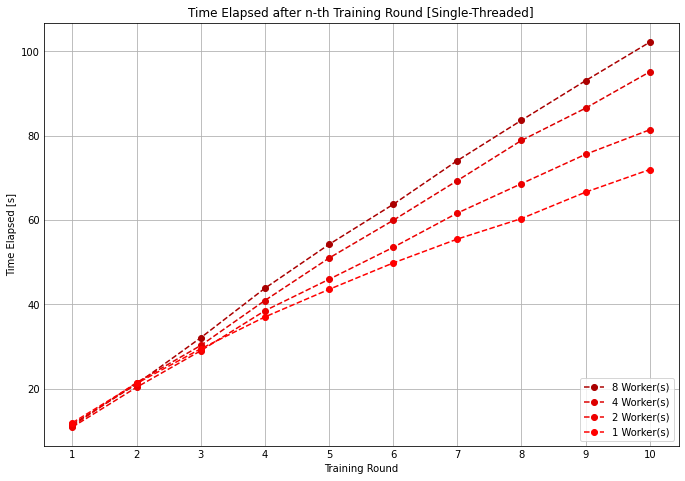

In [180]:
import matplotlib.pyplot as plt

single_threaded_training_times = {
    8: [11.481971979141235, 21.06865358352661, 32.05444097518921, 43.78777265548706, 54.19769239425659, 63.688286542892456, 74.07056212425232, 83.64049768447876, 93.04087591171265, 102.16776514053345],
    4: [11.134565114974976, 21.432404279708862, 30.219168186187744, 40.88900446891785, 50.95054054260254, 59.90651512145996, 69.32415723800659, 78.86217856407166, 86.5220353603363, 95.12839889526367],
    2: [10.868289709091187, 20.302647829055786, 28.97062063217163, 38.460485219955444, 45.914576292037964, 53.48994708061218, 61.6273672580719, 68.60588765144348, 75.56985259056091, 81.3848009109497],
    1: [11.893369436264038, 21.207906484603882, 29.435447692871094, 36.99051022529602, 43.52670192718506, 49.79359436035156, 55.46211814880371, 60.33178234100342, 66.59190773963928, 71.95667171478271]
}

colors = {
    1: "#FF0000",
    2: "#EE0000",
    4: "#DD0000",
    8: "#AA0000"
}

n_samples = len(single_threaded_training_times)
n_rounds = len(single_threaded_training_times[1])

plt.figure(figsize=(9,6))
xlabel = "Training Round"
ylabel = "Time Elapsed"
plt.xlabel(xlabel)
plt.xticks(np.arange(1, n_rounds+1))
plt.ylabel(f"{ylabel} [s]")
plt.title(f"{ylabel} after n-th {xlabel} [Single-Threaded]")

for number_of_workers, training_times in single_threaded_training_times.items():
    plt.plot(list(range(1,n_rounds+1)), list(training_times), color=colors[number_of_workers], marker="o", linestyle='dashed', label=f"{number_of_workers} Worker(s)")
plt.legend(loc ="lower right")
plt.savefig("prototypes/prototype_01/round_training_time_analysis.jpg", dpi=150, bbox_inches = "tight", transparent=False)
plt.show()

-----------
### --- Experiment 02 ---

In [ ]:
experiments = Experiment(original_working_directory_path)
experiment_id = 1
experiment_version = 0
experiment_path = experiments.get_experiment_path(experiment_id, experiment_version)

NR_ROUNDS = 10
NR_EPISODES_PER_ROUND=1000

seed_random()

train_data, test_data, _ = DataProvider.get_scaled_train_test_split(scaling_minmax=True, scale_normal_only=True)

environment_01 = SensorEnvironment(train_data)
environment_02 = SensorEnvironment(train_data)

global_agent = Agent(0, input_dims=environment_02.observation_space_size, n_actions=len(environment_02.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

agent_01 = Agent(1, input_dims=environment_01.observation_space_size, n_actions=len(environment_01.actions), buffer_size=BUFFER_SIZE,
              batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

agent_02 = Agent(2, input_dims=environment_02.observation_space_size, n_actions=len(environment_02.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

server = Server(global_agent, test_data, experiment_id, experiment_path, nr_rounds=NR_ROUNDS, nr_episodes_per_round=NR_EPISODES_PER_ROUND, parallelized=True)

client_01 = Client(1, agent_01, environment_01, experiment_path, MIN_REPLAY_SIZE)
client_02 = Client(2, agent_02, environment_02, experiment_path, MIN_REPLAY_SIZE)

server.add_client(client_01)
server.add_client(client_02)

server.run_federation(execution=Execution.MULTI_PROCESSING_POOL, evaluations=["time"], evaluation_frequency=10, verbose=False, document_results=False)

/Users/jankreischer/Library/Mobile Documents/com~apple~CloudDocs/Master-Thesis/Code/prototypes/prototype_01/experiments/experiment_01
/Users/jankreischer/Library/Mobile Documents/com~apple~CloudDocs/Master-Thesis/Code
Total time elapsed until end of round 1: 8.185750007629395s


In [268]:
from functools import reduce 

sample_distribution_percentages = {
    Behavior.NORMAL: 20,
    Behavior.RANSOMWARE_POC: 20,
    Behavior.ROOTKIT_BDVL: 10,
    Behavior.ROOTKIT_BEURK: 10,
    Behavior.CNC_THETICK: 10, 
    Behavior.CNC_BACKDOOR_JAKORITAR: 10,
    Behavior.CNC_OPT1: 10,
    Behavior.CNC_OPT2: 10
}

sum_of_percentages = reduce(lambda x, y: x+y, sample_distribution_percentages.values())
assert sum_of_percentages == 100, f"Make sure that all percentages sum to 100. Right now it is {sum_of_percentages}"

In [311]:
a = [[i]*8 for i in range(1,101)]
m = np.asarray(a)
#np.asarray(a)
np.random.shuffle(m)
last_row = m[-1]
new_matrix = m[:-1]

In [252]:
for key, value in train_data.items():
    print(len(value))

9633
6196
3405
4723
4941
2391
3632
2533


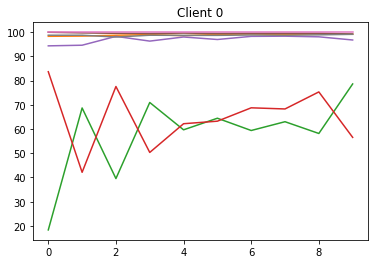

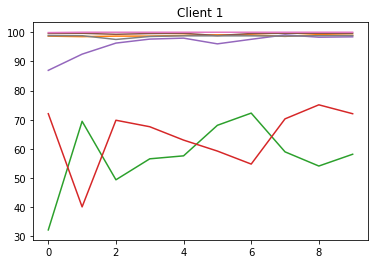

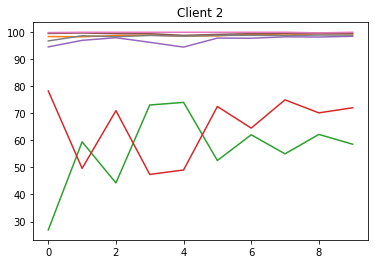

In [76]:
for id in range(3):
    for behavior in Behavior:
        performance = server.client_performance[id][behavior]
        plt.title(f"Client {id}")
        plt.plot([*range(len(performance))], performance) # plotting t, a separately 
    plt.show()

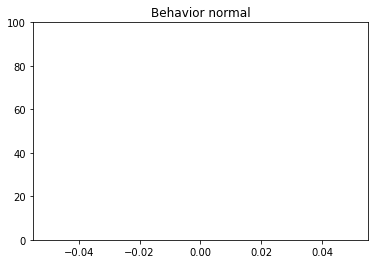

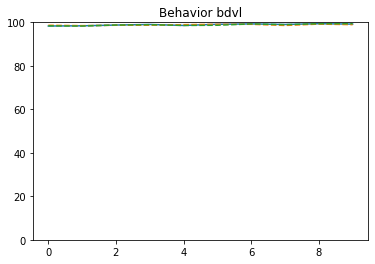

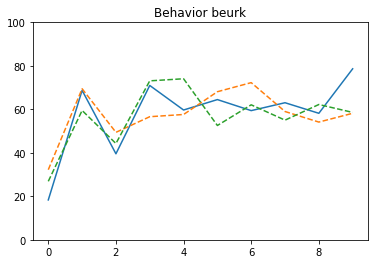

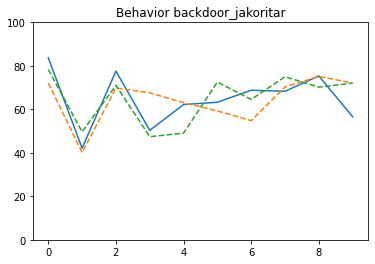

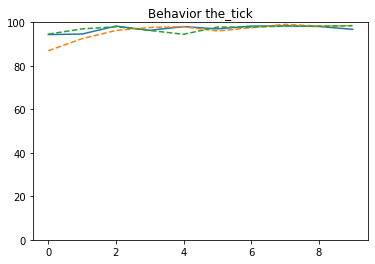

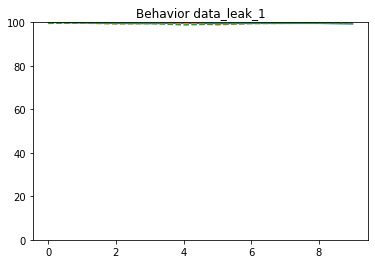

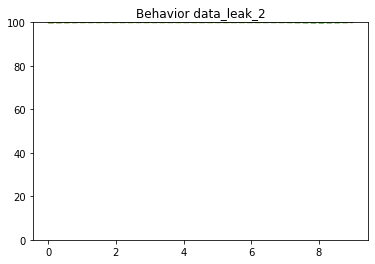

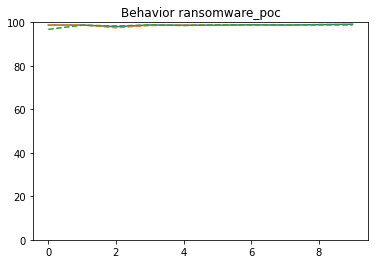

In [81]:
for behavior in Behavior:
    for id in range(3):
        performance = server.client_performance[id][behavior]
        plt.title(f"Behavior {behavior.value}")
        plt.ylim([0,100])
        if id == 0:
            plt.plot([*range(len(performance))], performance, linestyle='-') # plotting t, a separately 
        else:
            plt.plot([*range(len(performance))], performance, linestyle='--') # plotting t, a separately 
    plt.show()

-----------
### Experiment 02

In [ ]:
experiments = Experiment(original_working_directory_path)
experiment_id = 2
experiment_version = 0
experiment_path = experiments.get_experiment_path(experiment_id, experiment_version)

NR_ROUNDS = 10
NR_EPISODES_PER_ROUND=1000

seed_random()

train_data, test_data, _ = DataProvider.get_scaled_train_test_split(scaling_minmax=True, scale_normal_only=True)
training_data_strides = split_training_data(train_data, 2)

environment_01 = SensorEnvironment(training_data_strides[0])
environment_02 = SensorEnvironment(training_data_strides[1])

global_agent = Agent(0, input_dims=environment_02.observation_space_size, n_actions=len(environment_02.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

agent_01 = Agent(1, input_dims=environment_01.observation_space_size, n_actions=len(environment_01.actions), buffer_size=BUFFER_SIZE,
              batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

agent_02 = Agent(2, input_dims=environment_02.observation_space_size, n_actions=len(environment_02.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

server = Server(global_agent, test_data, experiment_id, experiment_path, nr_rounds=NR_ROUNDS, nr_episodes_per_round=NR_EPISODES_PER_ROUND, parallelized=True)

client_01 = Client(1, agent_01, environment_01, MIN_REPLAY_SIZE)
client_02 = Client(2, agent_02, environment_02, MIN_REPLAY_SIZE)

server.add_client(client_01)
server.add_client(client_02)

server.run_federation(evaluations=["performance_evaluation", "learning_curve"], evaluation_frequency=1)

-----------
### Experiment 03

In [ ]:
experiments = Experiment(original_working_directory_path)
experiment_id = 3
experiment_version = 0
experiment_path = experiments.get_experiment_path(experiment_id, experiment_version)

EPSILON_START = 1.0
EPSILON_DEC = 1e-4
EPSILON_END = 0.01
NR_ROUNDS = 10


seed_random()

full_train_data, full_test_data, _ = DataProvider.get_scaled_train_test_split(scaling_minmax=True, scale_normal_only=True)

subset_1 = (Behavior.NORMAL, Behavior.RANSOMWARE_POC, Behavior.ROOTKIT_BDVL, Behavior.ROOTKIT_BEURK)
subset_2 = (Behavior.NORMAL, Behavior.CNC_THETICK, Behavior.CNC_BACKDOOR_JAKORITAR, Behavior.CNC_OPT1, Behavior.CNC_OPT2)
sub_train_1 = {x: full_train_data[x] for x in subset_1 if x in full_train_data}
sub_train_2 = {x: full_train_data[x] for x in subset_2 if x in full_train_data}

environment_01 = SensorEnvironment(sub_train_1)
environment_02 = SensorEnvironment(sub_train_2)


global_agent = Agent(0, input_dims=environment_02.observation_space_size, n_actions=len(environment_02.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

agent_01 = Agent(1, input_dims=environment_01.observation_space_size, n_actions=len(environment_01.actions), buffer_size=BUFFER_SIZE,
              batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

agent_02 = Agent(2, input_dims=environment_02.observation_space_size, n_actions=len(environment_02.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

server = Server(global_agent, test_data, experiment_id, experiment_path, nr_rounds=NR_ROUNDS, nr_episodes_per_round=NR_EPISODES_PER_ROUND, parallelized=True)

client_01 = Client(1, agent_01, environment_01, MIN_REPLAY_SIZE)
client_02 = Client(2, agent_02, environment_02, MIN_REPLAY_SIZE)

server.add_client(client_01)
server.add_client(client_02)

server.run_federation(evaluations=["performance_evaluation", "learning_curve"], evaluation_frequency=1)

-----------
#### Experiment 04

In [ ]:
experiments = Experiment(original_working_directory_path)
experiment_id = 4
experiment_version = 0
experiment_path = experiments.get_experiment_path(experiment_id, experiment_version)

EPSILON_START = 1.0
EPSILON_DEC = 1e-4
EPSILON_END = 0.01
NR_ROUNDS = 10


seed_random()

full_train_data, full_test_data, _ = DataProvider.get_scaled_train_test_split(scaling_minmax=True, scale_normal_only=True)

subset_1 = (Behavior.NORMAL, Behavior.RANSOMWARE_POC, Behavior.ROOTKIT_BDVL, Behavior.ROOTKIT_BEURK)
subset_2 = (Behavior.NORMAL, Behavior.CNC_THETICK, Behavior.CNC_BACKDOOR_JAKORITAR, Behavior.CNC_OPT1, Behavior.CNC_OPT2)
sub_train_1 = {x: full_train_data[x] for x in subset_1 if x in full_train_data}
sub_train_2 = {x: full_train_data[x] for x in subset_2 if x in full_train_data}

environment_01 = SensorEnvironment(sub_train_1)
environment_02 = SensorEnvironment(sub_train_2)


global_agent = Agent(0, input_dims=environment_02.observation_space_size, n_actions=len(environment_02.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

agent_01 = Agent(1, input_dims=environment_01.observation_space_size, n_actions=len(environment_01.actions), buffer_size=BUFFER_SIZE,
              batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

agent_02 = Agent(2, input_dims=environment_02.observation_space_size, n_actions=len(environment_02.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

server = Server(global_agent, test_data, experiment_id, experiment_path, nr_rounds=NR_ROUNDS, nr_episodes_per_round=NR_EPISODES_PER_ROUND, parallelized=False)

client_01 = Client(1, agent_01, environment_01, experiment_path, MIN_REPLAY_SIZE)
client_02 = Client(2, agent_02, environment_02, experiment_path, MIN_REPLAY_SIZE)

server.add_client(client_01)
server.add_client(client_02)

server.run_federation(evaluations=["performance_evaluation", "learning_curve"], evaluation_frequency=1)

-----------
#### Experiment 05

In [ ]:
experiments = Experiment(original_working_directory_path)
experiment_id = 5
experiment_version = 0
experiment_path = experiments.get_experiment_path(experiment_id, experiment_version)

seed_random()

full_train_data, full_test_data, _ = DataProvider.get_scaled_train_test_split(scaling_minmax=True, scale_normal_only=True)

subset_1 = (Behavior.NORMAL, Behavior.RANSOMWARE_POC, Behavior.ROOTKIT_BDVL, Behavior.CNC_OPT1)
subset_2 = (Behavior.NORMAL, Behavior.CNC_THETICK, Behavior.ROOTKIT_BEURK , Behavior.CNC_OPT2, Behavior.CNC_BACKDOOR_JAKORITAR)
sub_train_1 = {x: full_train_data[x] for x in subset_1 if x in full_train_data}
sub_train_2 = {x: full_train_data[x] for x in subset_2 if x in full_train_data}

environment_01 = SensorEnvironment(sub_train_1)
environment_02 = SensorEnvironment(sub_train_2)


global_agent = Agent(0, input_dims=environment_02.observation_space_size, n_actions=len(environment_02.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC, is_global_agent=True)

agent_01 = Agent(1, input_dims=environment_01.observation_space_size, n_actions=len(environment_01.actions), buffer_size=BUFFER_SIZE,
              batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

agent_02 = Agent(2, input_dims=environment_02.observation_space_size, n_actions=len(environment_02.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

server = Server(global_agent, test_data, experiment_id, experiment_path, nr_rounds=NR_ROUNDS, nr_episodes_per_round=NR_EPISODES_PER_ROUND, parallelized=False)

client_01 = Client(1, agent_01, environment_01, experiment_path, MIN_REPLAY_SIZE)
client_02 = Client(2, agent_02, environment_02, experiment_path, MIN_REPLAY_SIZE)

server.add_client(client_01)
server.add_client(client_02)

server.run_federation(evaluations=["performance_evaluation", "learning_curve"], evaluation_frequency=1)

-----------
### Experiment 06

In [ ]:
experiments = Experiment(original_working_directory_path)
experiment_id = 6
experiment_version = 0
experiment_path = experiments.get_experiment_path(experiment_id, experiment_version)


seed_random()
start = time()

full_train_data, full_test_data, _ = DataProvider.get_scaled_train_test_split(scaling_minmax=True, scale_normal_only=True)

subset_1 = (Behavior.NORMAL, Behavior.RANSOMWARE_POC, Behavior.ROOTKIT_BDVL, Behavior.CNC_BACKDOOR_JAKORITAR, Behavior.CNC_OPT1)
subset_2 = (Behavior.NORMAL, Behavior.CNC_THETICK, Behavior.ROOTKIT_BEURK , Behavior.CNC_OPT2)
sub_train_1 = {x: full_train_data[x] for x in subset_1 if x in full_train_data}
sub_train_2 = {x: full_train_data[x] for x in subset_2 if x in full_train_data}

environment_01 = SensorEnvironment(sub_train_1)
environment_02 = SensorEnvironment(sub_train_2)


global_agent = Agent(0, input_dims=environment_02.observation_space_size, n_actions=len(environment_02.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC, is_global_agent=True)

agent_01 = Agent(1, input_dims=environment_01.observation_space_size, n_actions=len(environment_01.actions), buffer_size=BUFFER_SIZE,
              batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

agent_02 = Agent(2, input_dims=environment_02.observation_space_size, n_actions=len(environment_02.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)


server = Server(global_agent, full_test_data, experiment_id, experiment_path, nr_rounds=NR_ROUNDS, nr_episodes_per_round=NR_EPISODES_PER_ROUND, parallelized=False)

client_01 = Client(1, agent_01, environment_01, experiment_path, MIN_REPLAY_SIZE)
client_02 = Client(2, agent_02, environment_02, experiment_path, MIN_REPLAY_SIZE)
# initialize memory replay buffer (randomly)
client_01.init_replay_memory(MIN_REPLAY_SIZE)
client_02.init_replay_memory(MIN_REPLAY_SIZE)

server.add_client(client_01)
server.add_client(client_02)

server.run_federation(evaluations=["performance_evaluation", "learning_curve"], evaluation_frequency=1)


-----------
### Experiment 07

In [ ]:
experiments = Experiment(original_working_directory_path)
experiment_id = 7
experiment_version = 0
experiment_path = experiments.get_experiment_path(experiment_id, experiment_version)

NR_ROUNDS = 100
NR_EPISODES_PER_ROUND=100

seed_random()

train_data, test_data, _ = DataProvider.get_scaled_train_test_split(scaling_minmax=True, scale_normal_only=True)

environment_01 = SensorEnvironment(train_data)
environment_02 = SensorEnvironment(train_data)


global_agent = Agent(0, input_dims=environment_02.observation_space_size, n_actions=len(environment_02.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

agent_01 = Agent(1, input_dims=environment_01.observation_space_size, n_actions=len(environment_01.actions), buffer_size=BUFFER_SIZE,
              batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

agent_02 = Agent(2, input_dims=environment_02.observation_space_size, n_actions=len(environment_02.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

server = Server(global_agent, test_data, experiment_id, experiment_path, nr_rounds=NR_ROUNDS, nr_episodes_per_round=NR_EPISODES_PER_ROUND, parallelized=False)

client_01 = Client(1, agent_01, environment_01, experiment_path, MIN_REPLAY_SIZE)
client_02 = Client(2, agent_02, environment_02, experiment_path, MIN_REPLAY_SIZE)

server.add_client(client_01)
server.add_client(client_02)

server.run_federation(evaluations=["performance_evaluation"])

-----------
#### Experiment 8.1

In [ ]:
experiments = Experiment(original_working_directory_path)
experiment_id = 8
experiment_version = 1
experiment_path = experiments.get_experiment_path(experiment_id, experiment_version)


NR_ROUNDS = 10
NR_EPISODES_PER_ROUND=1000
NR_CLIENTS = 5

environemnts = []
clients = []

seed_random()

train_data, test_data, _ = DataProvider.get_scaled_train_test_split(scaling_minmax=True, scale_normal_only=True)
training_data_strides = split_training_data(train_data, NR_CLIENTS)

environment = SensorEnvironment(train_data)
global_agent = Agent(0, input_dims=environment.observation_space_size, n_actions=len(environment.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

server = Server(global_agent, full_test_data, experiment_id, experiment_path, nr_rounds=NR_ROUNDS, nr_episodes_per_round=NR_EPISODES_PER_ROUND, parallelized=False)

for i in range(NR_CLIENTS):
    id = i + 1
    environment = SensorEnvironment(training_data_strides[i])
    agent = Agent(id, input_dims=environment.observation_space_size, n_actions=len(environment.actions), buffer_size=BUFFER_SIZE,
              batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)
    client = Client(id, agent, environment, experiment_path, MIN_REPLAY_SIZE)
    client.init_replay_memory(MIN_REPLAY_SIZE)
    server.add_client(client)

server.run_federation(evaluations=["performance_evaluation", "learning_curve"], evaluation_frequency=1)

In [ ]:
experiments = Experiment(original_working_directory_path)
experiment_id = 8
experiment_version = 2
experiment_path = experiments.get_experiment_path(experiment_id, experiment_version)

NR_ROUNDS = 10
NR_EPISODES_PER_ROUND=1000
NR_CLIENTS = 5

environemnts = []
clients = []

seed_random()

# read in all preprocessed data for a simulated, supervised environment to sample from
train_data, test_data, _ = DataProvider.get_scaled_train_test_split(scaling_minmax=True, scale_normal_only=True)
training_data_strides = split_training_data(train_data, NR_CLIENTS)

# train_data, test_data = DataProvider.get_reduced_dimensions_with_pca(DIMS, pi=PI, normal_only=True)
environment = SensorEnvironment(train_data)
global_agent = Agent(0, input_dims=environment.observation_space_size, n_actions=len(environment.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

server = Server(global_agent, full_test_data, experiment_id, experiment_path, nr_rounds=NR_ROUNDS, nr_episodes_per_round=NR_EPISODES_PER_ROUND, parallelized=True)



for i in range(NR_CLIENTS):
    id = i + 1
    environment = SensorEnvironment(training_data_strides[i])
    agent = Agent(id, input_dims=environment.observation_space_size, n_actions=len(environment.actions), buffer_size=BUFFER_SIZE,
              batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)
    client = Client(id, agent, environment, experiment_path)
    client.init_replay_memory(MIN_REPLAY_SIZE)
    server.add_client(client)

server.run_federation(evaluations=["performance_evaluation", "learning_curve"], evaluation_frequency=1)

-----------
#### Experiment 09

In [ ]:
experiments = Experiment(original_working_directory_path)
experiment_id = 9
experiment_version = 0
experiment_path = experiments.get_experiment_path(experiment_id, experiment_version)

NR_ROUNDS = 100
NR_EPISODES_PER_ROUND=100
NR_CLIENTS = 5

environemnts = []
clients = []

seed_random()

# read in all preprocessed data for a simulated, supervised environment to sample from
train_data, test_data, _ = DataProvider.get_scaled_train_test_split(scaling_minmax=True, scale_normal_only=True)
training_data_strides = split_training_data(train_data, NR_CLIENTS)

# train_data, test_data = DataProvider.get_reduced_dimensions_with_pca(DIMS, pi=PI, normal_only=True)
environment = SensorEnvironment(train_data)
global_agent = Agent(0, input_dims=environment.observation_space_size, n_actions=len(environment.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

server = Server(global_agent, full_test_data, experiment_id, experiment_path, nr_rounds=NR_ROUNDS, nr_episodes_per_round=NR_EPISODES_PER_ROUND, parallelized=False)



for i in range(NR_CLIENTS):
    id = i + 1
    environment = SensorEnvironment(training_data_strides[i])
    agent = Agent(id, input_dims=environment.observation_space_size, n_actions=len(environment.actions), buffer_size=BUFFER_SIZE,
              batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)
    client = Client(id, agent, environment, experiment_path)
    client.init_replay_memory(MIN_REPLAY_SIZE)
    server.add_client(client)

server.run_federation(evaluations=["performance_evaluation", "learning_curve"], evaluation_frequency=10)

In [ ]:
experiments = Experiment(original_working_directory_path)
experiment_id = 10
experiment_version = 0
experiment_path = experiments.get_experiment_path(experiment_id, experiment_version)

NR_ROUNDS = 100
NR_EPISODES_PER_ROUND=100
NR_CLIENTS = 5

environemnts = []
clients = []

seed_random()

train_data, test_data, _ = DataProvider.get_scaled_train_test_split(scaling_minmax=True, scale_normal_only=True)
training_data_strides = split_training_data(train_data, NR_CLIENTS)

environment = SensorEnvironment(train_data)
global_agent = Agent(0, input_dims=environment.observation_space_size, n_actions=len(environment.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

server = Server(global_agent, test_data, experiment_id, experiment_path, nr_rounds=NR_ROUNDS, nr_episodes_per_round=NR_EPISODES_PER_ROUND, parallelized=False)

for behavior in Behavior:
    print(str(behavior).split('.')[1])

for i in range(NR_CLIENTS):
    id = i + 1
    environment = SensorEnvironment(training_data_strides[i])
    agent = Agent(id, input_dims=environment.observation_space_size, n_actions=len(environment.actions), buffer_size=BUFFER_SIZE,
              batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)
    client = Client(id, agent, environment, experiment_path)
    client.init_replay_memory(MIN_REPLAY_SIZE)
    client.plot_training_data_split()
    server.add_client(client)

server.run_federation(evaluations=["performance_evaluation", "learning_curve"], evaluation_frequency=10)